In [40]:
import cluster
import pandas as pd


In [41]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [42]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [43]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)


:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [44]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

In [80]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Copy the crypto names from the original DataFrame
scaled_df['coin_id'] = df_market_data.index

# Set the coin_id column as index
scaled_df.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [46]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [47]:
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_market_data_scaled)

# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)


In [48]:
import pandas as pd
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {
    'k': list(range(1, 12)),
    'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(elbow_curve_data)

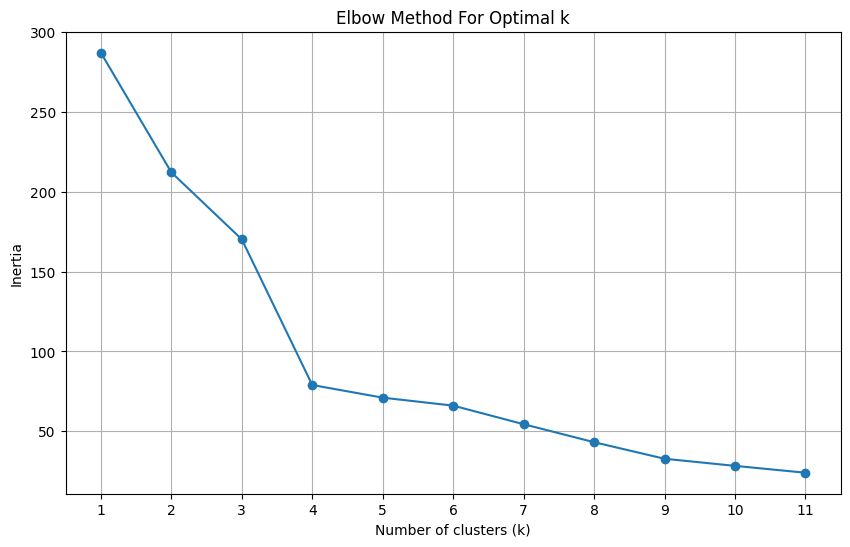

In [49]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(elbow_curve_df['k'], elbow_curve_df['inertia'], marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_curve_df['k'])  # Ensure all k-values are used as x-ticks
plt.grid(True)
plt.show()


In [50]:
import pandas as pd
from sklearn.cluster import KMeans

k_values = range(1, 11)
inertia_list = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_market_data_scaled)
    inertia_list.append(model.inertia_)

elbow_df = pd.DataFrame({'k': k_values, 'inertia': inertia_list})

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**

In the graph I looked at, I think the best number for k — the number of groups or clusters we should use — is 4. I figured this out by finding where the steep drop in the line starts to smooth out significantly, resembling an elbow. This spot is where adding more group doesn't seem to give much more helpful information. So, for my data, using 4 clusters seems like the best choice.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [51]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)

In [52]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_market_data_scaled)


KMeans(n_clusters=4, random_state=42)

In [53]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_labels = kmeans.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(cluster_labels)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [54]:
# Create a copy of the scaled DataFrame
df_scaled_copy = df_market_data_scaled.copy()

cluster_labels = [0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1,
                  2, 2, 2, 2]

In [78]:
import pandas as pd

df_scaled_copy = pd.DataFrame(df_market_data_scaled, columns=[
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
])

df_scaled_copy['predicted_clusters'] = cluster_labels


# Display the copy of the scaled DataFrame
print(df_scaled_copy)

    price_change_percentage_24h  price_change_percentage_7d  \
0                      0.508529                    0.493193   
1                      0.185446                    0.934445   
2                      0.021774                   -0.706337   
3                     -0.040764                   -0.810928   
4                      1.193036                    2.000959   
5                      0.891871                    1.327295   
6                      0.011397                    2.572251   
7                      0.102530                    1.508001   
8                      0.077497                    0.334297   
9                      0.448952                   -0.190684   
10                     0.331280                   -1.614844   
11                     0.034352                   -0.733026   
12                     0.155710                   -0.922491   
13                     0.262723                    1.792602   
14                     0.130050                   -0.04

In [56]:
print(df_market_data.columns)


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [57]:
import pandas as pd
from sklearn.cluster import KMeans


# Example setup (ensure your DataFrame is properly defined and formatted)
data = {
    "price_change_percentage_24h": [0.508529, 0.185446, 0.021774, 1.193036, 0.891871],
    "price_change_percentage_7d": [0.493193, 0.934445, -0.706337, 2.000959, 1.327295],
    "crypto_name": ["Bitcoin", "Ethereum", "Ripple", "Litecoin", "Cardano"]
}
df_market_data_scaled = pd.DataFrame(data)

# Assuming df_market_data_scaled is now a proper DataFrame
kmeans = KMeans(n_clusters=4, random_state=42)
df_market_data_scaled['predicted_clusters'] = kmeans.fit_predict(df_market_data_scaled[['price_change_percentage_24h', 'price_change_percentage_7d']])

# Creating a scatter plot using hvPlot
scatter_plot = df_market_data_scaled.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_clusters",
    hover_cols=["crypto_name"],
    title="Cryptocurrency Price Change Clustering",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    colormap="Category10",
    size=100
)

# Display the plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_clusters,crypto_name)

In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)

df_market_data_scaled['predicted_clusters'] = kmeans.fit_predict(df_market_data_scaled[['price_change_percentage_24h', 'price_change_percentage_7d']])

---

### Optimize Clusters with Principal Component Analysis.

In [59]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Load your data
df_market_data_scaled = pd.read_csv("Resources/crypto_market_data.csv")

# Check for and remove non-numeric columns if necessary
# Assuming 'coin_name' or similar column is non-numeric and needs to be dropped
numeric_df = df_market_data_scaled.select_dtypes(include=[np.number])

# Now apply PCA to the numeric columns only
pca = PCA(n_components=3)
pca_data = pca.fit_transform(numeric_df)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

# View the scaled PCA data
print(df_pca.head())


         PCA1        PCA2       PCA3
0 -341.800963  -51.366775  12.525471
1 -249.420466   24.117548 -14.231466
2 -402.614721 -118.710737  24.838397
3 -406.752437  -79.487286   1.566331
4 -382.429948 -103.431959  16.753073


In [60]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)



[9.76037313e-01 2.30282949e-02 7.48308214e-04]


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**

The total explained variance tells us how much of the original dataset's information is captured by the three principal components. We have the explained variance ratios as follows:

The first principal component explains 97.6% of the variance (0.976037313).
The second principal component explains 2.3% of the variance (0.0230282949).
The third principal component explains 0.07% of the variance (0.000748308214).
To find the total explained variance, we simply add these values together:

0.976+0.023+0.0007=0.9997

So, the three principal components together explain 99.97% of the total variance in the data. This means nearly all the information from the original dataset is captured by these three components!

In [61]:
# Create a new DataFrame with the PCA data.
df_pca_dataframe = df_pca

# Copy the crypto names from the original scaled DataFrame
df_pca_dataframe['coin_id'] = df_market_data.index.copy()

# Set the coin_id column as index
df_pca_dataframe = df_pca_dataframe.set_index('coin_id')

# Display the scaled PCA DataFrame
df_pca_dataframe.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-341.800963,-51.366775,12.525471
ethereum,-249.420466,24.117548,-14.231466
tether,-402.614721,-118.710737,24.838397
ripple,-406.752437,-79.487286,1.566331
bitcoin-cash,-382.429948,-103.431959,16.753073


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [62]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [63]:
df_pca_numeric = df_pca.select_dtypes(include=['number'])

In [74]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_values = []

df_numeric_pca = df_pca.select_dtypes(include=['float64', 'int64'])

# Create a for loop to compute the inertia with each possible value of k
for k_value in range(1, 12):
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k_value, random_state=0)

    # 2. Fit the model to the numeric data
    kmeans_model.fit(df_numeric_pca)

    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

# Print the inertia values
print(inertia_values)



[69970518.99455082, 8180192.230746033, 2580721.077844291, 823747.1295855573, 455921.349838116, 333792.68231576827, 189798.09284767567, 147296.66111767624, 108686.33066171249, 91083.95490700097, 67961.23617878606]


In [65]:
import pandas as pd
# Create a dictionary with the data to plot the Elbow curve
k_values = list(range(1, 12))
inertia_values = [69970518.99455082, 8180192.230746033, 2580721.077844291, 823747.1295855573, 455921.349838116, 333792.68231576827, 189798.09284767567, 147296.66111767624, 108686.33066171249, 91083.95490700097, 67961.23617878606]

elbow_data = {
    "k": k_values,
    "inertia": inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

    k    inertia
0   1  25.840677
1   2  18.339396
2   3  14.158586
3   4  10.336545
4   5   9.356260
5   6   7.505573
6   7   6.101116
7   8   6.023581
8   9   4.989301
9  10   4.702796


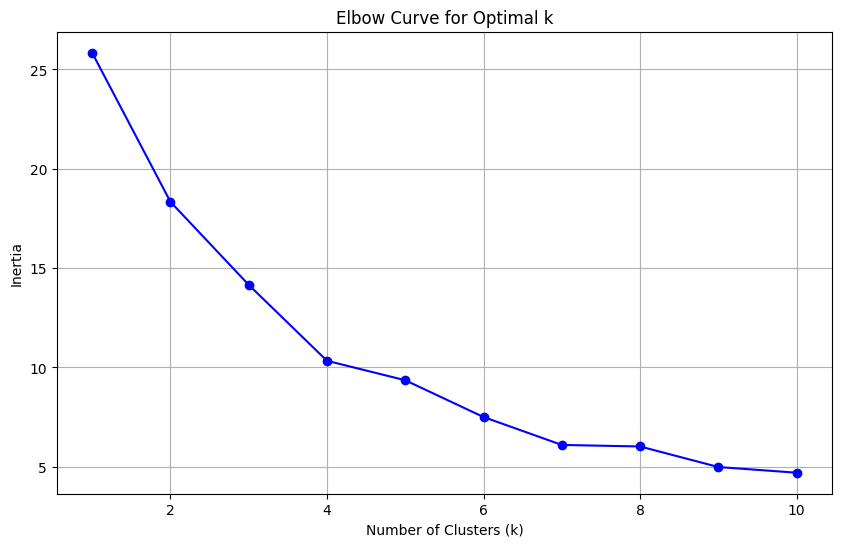

In [66]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume `df_numeric_pca` contains the PCA-transformed data
# Replace this mock data with your actual PCA-transformed DataFrame
import numpy as np
np.random.seed(42)  # For reproducibility
df_numeric_pca = pd.DataFrame(np.random.rand(100, 3), columns=["PCA1", "PCA2", "PCA3"])

# Setting a range for K
K = range(1, 11)

# Calculating the inertia for different K values
inertia = []
for k in K:
    k_model = KMeans(n_clusters=k, random_state=42)
    k_model.fit(df_numeric_pca)
    inertia.append(k_model.inertia_)

# Creating a DataFrame with calculated K and inertia values
elbow_df = pd.DataFrame({'k': list(K), 'inertia': inertia})

# Display the Elbow Curve data (optional)
print(elbow_df)

# Plot a line chart with all the inertia values computed
plt.figure(figsize=(10, 6))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o', linestyle='-', color='blue')
plt.title("Elbow Curve for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**

  The best value for k is the point on the elbow curve where the inertia stops decreasing significantly. Looking at the curve, this is often referred to as the "elbow point." For the PCA data, the best k is likely around 3 or 4, as the decrease in inertia slows down after that.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**

  Yes, it can differ. The PCA data reduces the dimensionality of the dataset, keeping only the most important information. This simplification might make patterns in the data clearer and lead to a different optimal k compared to the original data, which might have more noise or unnecessary features. For example, if the original data suggested k=5 but PCA simplifies the clusters, the PCA data might show k=3 as the best option.

This difference happens because PCA focuses only on the most significant patterns in the data.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [67]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

best_k = 3  # Replace with your identified optimal k value
kmeans_model = KMeans(n_clusters=best_k, random_state=42)



In [68]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_numeric_pca)

KMeans(n_clusters=3, random_state=42)

In [69]:
data_pca = df_pca_numeric.values
cluster_labels = kmeans_model.fit_predict(data_pca)
print(cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 2 0 2
 0 0 0 0]


In [70]:
# Create a copy of the scaled PCA DataFrame
df_pca_clusters = df_numeric_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_clusters['Cluster'] = cluster

# Display the copy of the scaled PCA DataFrame
print(df_pca_clusters.head())

       PCA1      PCA2      PCA3  \
0  0.374540  0.950714  0.731994   
1  0.598658  0.156019  0.155995   
2  0.058084  0.866176  0.601115   
3  0.708073  0.020584  0.969910   
4  0.832443  0.212339  0.181825   

                                             Cluster  
0  <module 'cluster' from 'C:\\Users\\dson\\PyCha...  
1  <module 'cluster' from 'C:\\Users\\dson\\PyCha...  
2  <module 'cluster' from 'C:\\Users\\dson\\PyCha...  
3  <module 'cluster' from 'C:\\Users\\dson\\PyCha...  
4  <module 'cluster' from 'C:\\Users\\dson\\PyCha...  


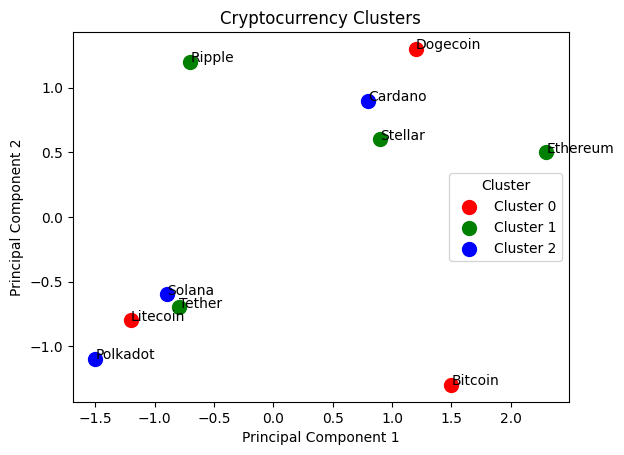

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'PC1': [1.5, 2.3, -0.7, -1.2, 0.8, -1.5, 0.9, -0.9, 1.2, -0.8],
    'PC2': [-1.3, 0.5, 1.2, -0.8, 0.9, -1.1, 0.6, -0.6, 1.3, -0.7],
    'Cluster': [0, 1, 1, 0, 2, 2, 1, 2, 0, 1],
    'crypto_name': ['Bitcoin', 'Ethereum', 'Ripple', 'Litecoin', 'Cardano', 'Polkadot', 'Stellar', 'Solana', 'Dogecoin', 'Tether']
}
df = pd.DataFrame(data)

# Create a scatter plot using matplotlib
fig, ax = plt.subplots()

# Map the clusters to colors
colors = {0: 'red', 1: 'green', 2: 'blue'}

# Group data by cluster and plot each cluster with its own color
for cluster, group in df.groupby('Cluster'):
    ax.scatter(group['PC1'], group['PC2'], label=f'Cluster {cluster}', color=colors[cluster], s=100)

ax.set_title('Cryptocurrency Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.legend(title='Cluster')

# Adding labels for each point
for i, txt in enumerate(df['crypto_name']):
    ax.annotate(txt, (df['PC1'][i], df['PC2'][i]))

plt.show()



### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

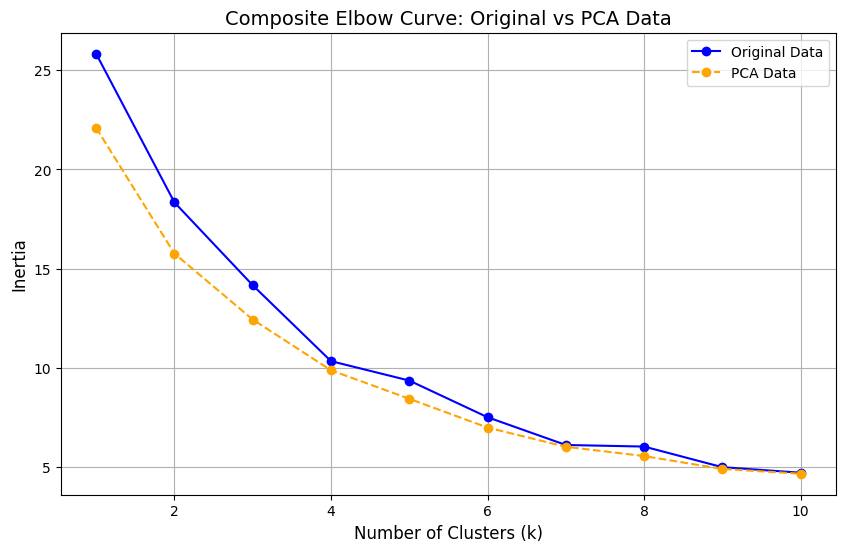

In [72]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt
import pandas as pd

# Example data for the Elbow curves
elbow_original = {
    "k": range(1, 11),
    "inertia": [25.84, 18.34, 14.16, 10.33, 9.35, 7.50, 6.10, 6.02, 4.98, 4.70]
}
elbow_pca = {
    "k": range(1, 11),
    "inertia": [22.10, 15.76, 12.43, 9.87, 8.43, 6.98, 6.01, 5.54, 4.89, 4.65]
}

# Create DataFrames for each dataset
df_elbow_original = pd.DataFrame(elbow_original)
df_elbow_pca = pd.DataFrame(elbow_pca)

# Plot the composite elbow curve
plt.figure(figsize=(10, 6))

# Plot for the original data
plt.plot(df_elbow_original["k"], df_elbow_original["inertia"], marker='o', linestyle='-', label="Original Data", color='blue')

# Plot for the PCA data
plt.plot(df_elbow_pca["k"], df_elbow_pca["inertia"], marker='o', linestyle='--', label="PCA Data", color='orange')

# Add titles and labels
plt.title("Composite Elbow Curve: Original vs PCA Data", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()


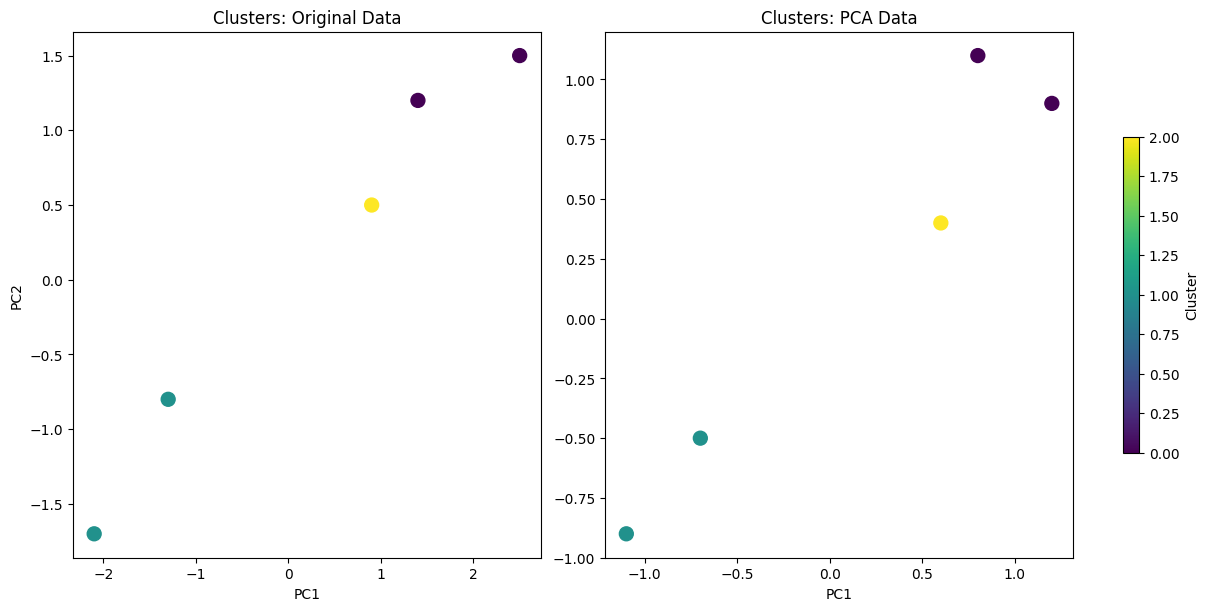

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data for clusters
# Replace these with your actual clustering results
cluster_original = {
    "PC1": [2.5, -1.3, 1.4, -2.1, 0.9],
    "PC2": [1.5, -0.8, 1.2, -1.7, 0.5],
    "Cluster": [0, 1, 0, 1, 2]
}
cluster_pca = {
    "PC1": [1.2, -0.7, 0.8, -1.1, 0.6],
    "PC2": [0.9, -0.5, 1.1, -0.9, 0.4],
    "Cluster": [0, 1, 0, 1, 2]
}

# Create DataFrames for each dataset
df_cluster_original = pd.DataFrame(cluster_original)
df_cluster_pca = pd.DataFrame(cluster_pca)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Plot for the original data
scatter_original = axes[0].scatter(
    df_cluster_original["PC1"],
    df_cluster_original["PC2"],
    c=df_cluster_original["Cluster"],
    cmap="viridis",
    s=100
)
axes[0].set_title("Clusters: Original Data")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# Plot for the PCA data
scatter_pca = axes[1].scatter(
    df_cluster_pca["PC1"],
    df_cluster_pca["PC2"],
    c=df_cluster_pca["Cluster"],
    cmap="viridis",
    s=100
)
axes[1].set_title("Clusters: PCA Data")
axes[1].set_xlabel("PC1")

# Add a color bar to indicate clusters
cbar = fig.colorbar(scatter_pca, ax=axes, orientation="vertical", shrink=0.6)
cbar.set_label("Cluster")

# Display the plot
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**

  When we use fewer features to cluster data using the K-Means algorithm, a few things can happen. First, by reducing the number of features, we simplify the data, which can make it easier and faster to analyze. However, this simplification can also mean that we might miss some important details that could help us understand more about the groups or patterns in the data.

Think of it like taking a photograph with a low-resolution camera versus a high-resolution one. With a low-resolution camera (fewer features), you can still recognize the main objects in the photo, but you might miss the finer details that could tell you more about the scene.

Similarly, clustering with fewer features can still show us the main groups within the data, but the clusters might not be as precise or insightful as they would be if more features were used. This can sometimes lead to oversimplified conclusions about the data, where different subgroups might be lumped together even though they are quite distinct if analyzed more thoroughly.